# Importing the necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

C:\Users\nikhil.bandi\Anaconda3\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Load the Dataset

In [2]:
weather_data=pd.read_csv('weather_classification_data.csv') 

In [3]:
df=weather_data.copy()  # making a copy of the dataset so any analysis won't effect the real dataset.

In [4]:
df.head() #printing first 5 rows of the dataset

Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0         14.0        73         9.5               82.0  partly cloudy   
1         39.0        96         8.5               71.0  partly cloudy   
2         30.0        64         7.0               16.0          clear   
3         38.0        83         1.5               82.0          clear   
4         27.0        74        17.0               66.0       overcast   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0               1010.82         2  Winter              3.5    inland   
1               1011.43         7  Spring             10.0    inland   
2               1018.72         5  Spring              5.5  mountain   
3               1026.25         7  Spring              1.0   coastal   
4                990.67         1  Winter              2.5  mountain   

  Weather Type  
0        Rainy  
1       Cloudy  
2        Sunny  
3        Sunny  
4        Rainy

In [5]:
df.shape #checking the size and shape of the data

(13200, 11)

In [6]:
df.info() #checking the column name and datatype of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [7]:
df.isnull().sum()  #checking any null values present in the data.
# we can see there are no null values.

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

In [8]:
df.duplicated().sum() #checking any duplicate rows present in the dataset.
# there are no dupicate rows in the dataset.

0

In [9]:
df_num=df.select_dtypes(include=np.number) # creating a dataframe for all numerical columns
df_num.describe() #simple statistical point estimeters for the numerical columns

Temperature      Humidity    Wind Speed  Precipitation (%)  \
count  13200.000000  13200.000000  13200.000000       13200.000000   
mean      19.127576     68.710833      9.832197          53.644394   
std       17.386327     20.194248      6.908704          31.946541   
min      -25.000000     20.000000      0.000000           0.000000   
25%        4.000000     57.000000      5.000000          19.000000   
50%       21.000000     70.000000      9.000000          58.000000   
75%       31.000000     84.000000     13.500000          82.000000   
max      109.000000    109.000000     48.500000         109.000000   

       Atmospheric Pressure      UV Index  Visibility (km)  
count          13200.000000  13200.000000     13200.000000  
mean            1005.827896      4.005758         5.462917  
std               37.199589      3.856600         3.371499  
min              800.120000      0.000000         0.000000  
25%              994.800000      1.000000         3.000000  
50%             1007.650000      3.000000         5.000000  
75%             1016.772500      7.000000         7.500000  
max             1199.210000     14.000000        20.000000

In [10]:
df_cat=df.select_dtypes(include=object) #creating a dataframe for all categoric columns
df_cat.describe() # basic statistical parameters.

Cloud Cover  Season Location Weather Type
count        13200   13200    13200        13200
unique           4       4        3            4
top       overcast  Winter   inland        Rainy
freq          6090    5610     4816         3300

# Univariate Analysis

In [11]:
for i in df_cat.columns:  #using for loop to all the categorical columns to find the value and count of sub-classes pressent
    print(i)             # in the categorical variables.
    a=df_cat[i].value_counts()
    print(a)

Cloud Cover
overcast         6090
partly cloudy    4560
clear            2139
cloudy            411
Name: Cloud Cover, dtype: int64
Season
Winter    5610
Spring    2598
Autumn    2500
Summer    2492
Name: Season, dtype: int64
Location
inland      4816
mountain    4813
coastal     3571
Name: Location, dtype: int64
Weather Type
Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: Weather Type, dtype: int64


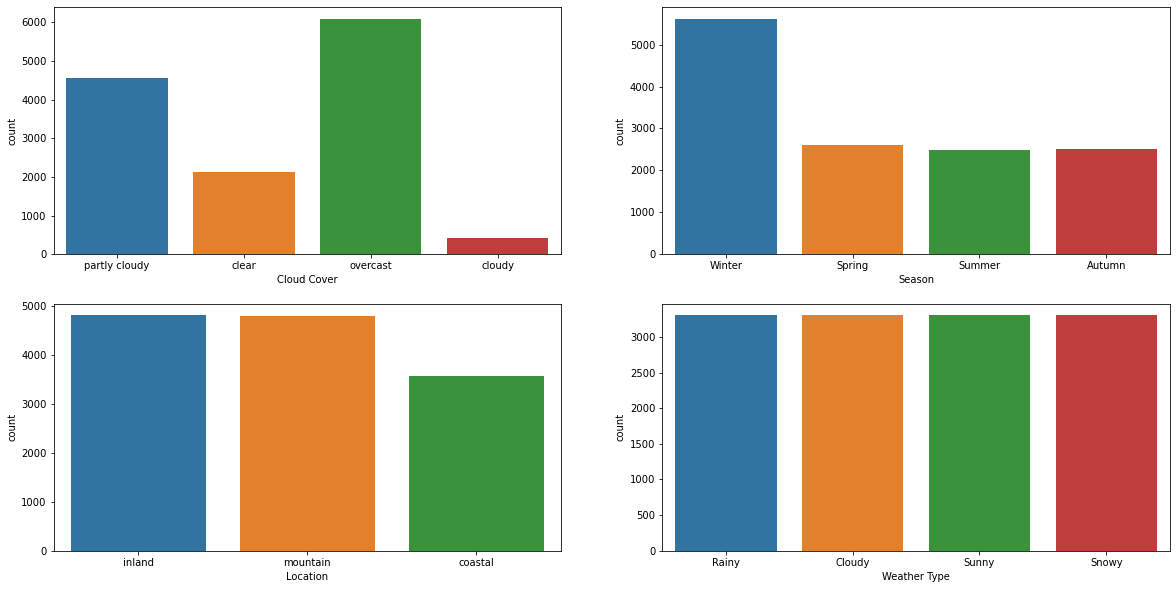

In [12]:
cols=df_cat.columns
fig,ax = plt.subplots(2,2,figsize=(20,10))
k=0
for i in range(2):
    for j in range(2):
        sns.countplot(df_cat[cols[k]],ax=ax[i][j])
        k=k+1

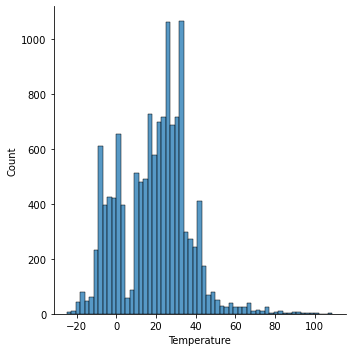

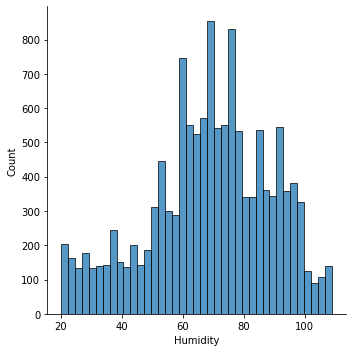

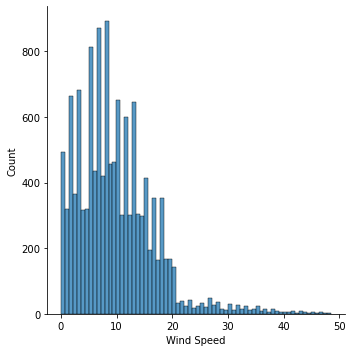

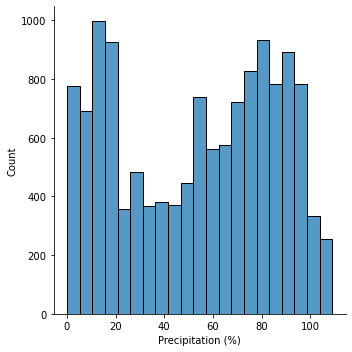

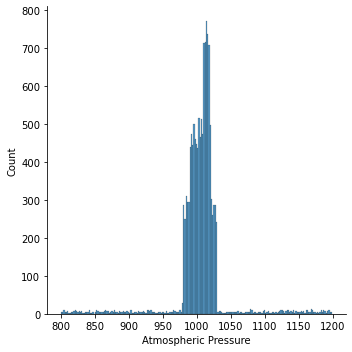

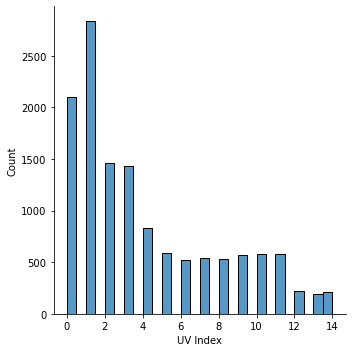

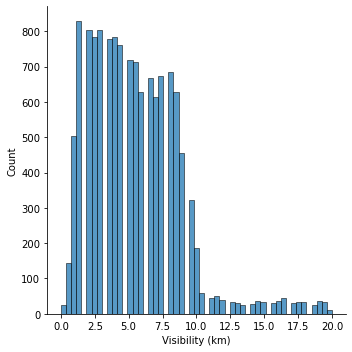

In [13]:
for i in df_num.columns:  # using for loop plotting distribution plots to see how all the numerical variables are spreaded
    sns.displot(df_num[i])
    plt.show()

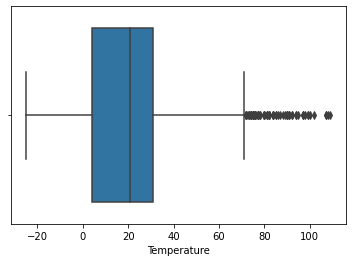

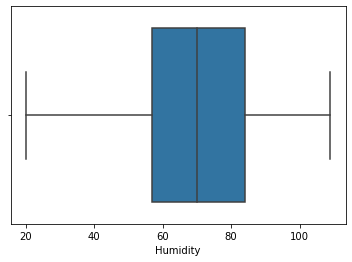

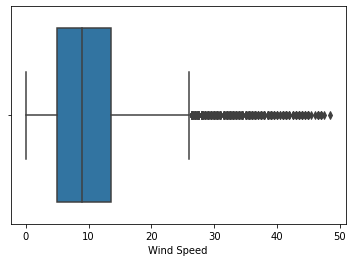

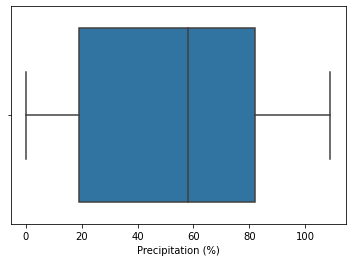

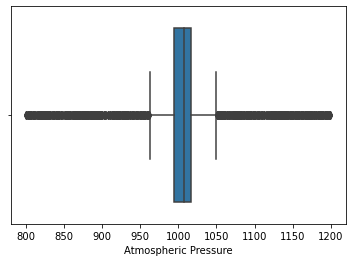

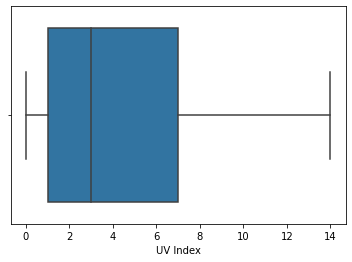

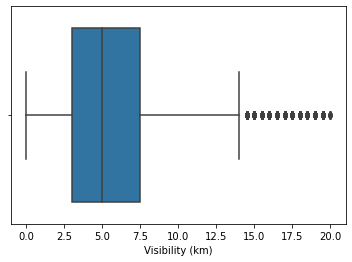

In [14]:
for i in df_num.columns:   # using for loop plotting box plots to see the presence of outliers in the data
    sns.boxplot(df_num[i])
    plt.show()

<AxesSubplot:xlabel='Temperature', ylabel='Count'>

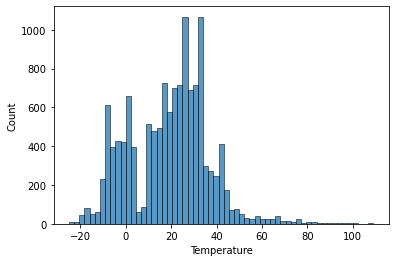

In [15]:
sns.histplot(df['Temperature'])
# here from the below plot we can see that the temperature is spred between -20 to 100 
# most of the data is between -20 to 40 means most of the places have the temperature betweeen them.

<AxesSubplot:xlabel='Humidity', ylabel='Count'>

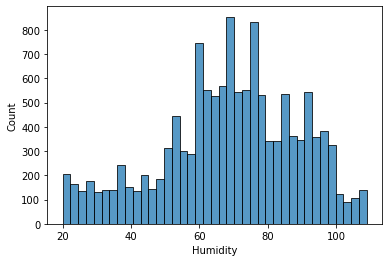

In [16]:
sns.histplot(df['Humidity'])
# the variable Humidity values between 20-110
# most of the places have the humidity between 60-80

<AxesSubplot:xlabel='Wind Speed', ylabel='Count'>

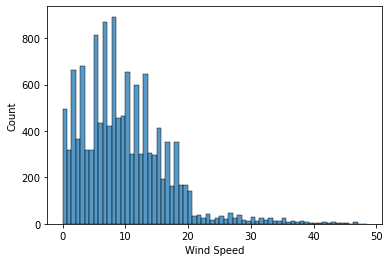

In [17]:
sns.histplot(df['Wind Speed'])
# as we can see that the plot for wind speed is a right skewed distribution.
# that means most of the places have wind speed between 0-20 some places have above 20 may be because of the geological 
# location of the place.

<AxesSubplot:xlabel='Precipitation (%)', ylabel='Count'>

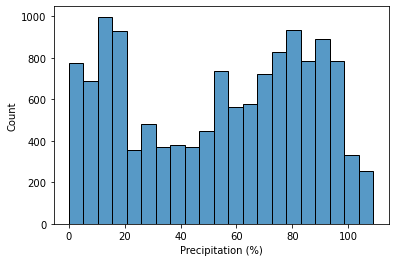

In [18]:
sns.histplot(df['Precipitation (%)'])
# this is the perentage of precipitation of the places
# most of the places have below 20% or above 80% precipitation precent.

In [19]:
df['Cloud Cover'].value_counts()
# we have 4 sub-classes present in the cloud cover dataset.
# most repeating ones are overcast.

overcast         6090
partly cloudy    4560
clear            2139
cloudy            411
Name: Cloud Cover, dtype: int64

<AxesSubplot:xlabel='Atmospheric Pressure', ylabel='Count'>

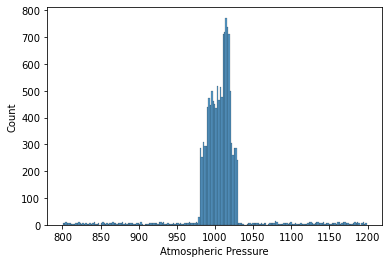

In [20]:
sns.histplot(df['Atmospheric Pressure'])
# As we see in the plot it has right skew and left skew  and most of the data is between 950-1050
#for some places the Atmospheric pressure is too low and some places has too high meight becasue of the 
# geological location of the places.

<AxesSubplot:xlabel='UV Index', ylabel='Count'>

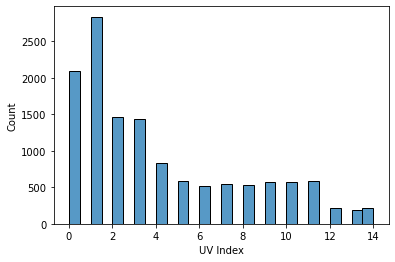

In [21]:
sns.histplot(df['UV Index'])
# as we see most of the places have less than 2 UV index compared to others.

In [22]:
df['Season'].value_counts()
# we have 4 seasons data given to us 
# most repeating one is winter.

Winter    5610
Spring    2598
Autumn    2500
Summer    2492
Name: Season, dtype: int64

<AxesSubplot:xlabel='Visibility (km)', ylabel='Count'>

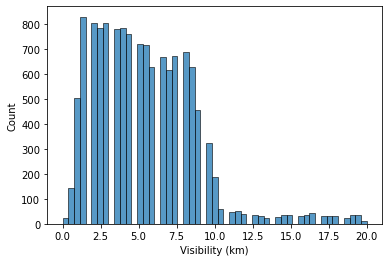

In [23]:
sns.histplot(df['Visibility (km)'])
# average visibility likely to be around 7.5 km for most of the places.

In [24]:
df['Location'].value_counts()
# here we can see that we have 3 locations mentioning type of geological place it is.


inland      4816
mountain    4813
coastal     3571
Name: Location, dtype: int64

In [25]:
df['Weather Type'].value_counts() #This is our target variable mentioning type of weather today.
# we have equal no of rows in each sub-class present in the target column.

Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: Weather Type, dtype: int64

# Bi variate Analysis

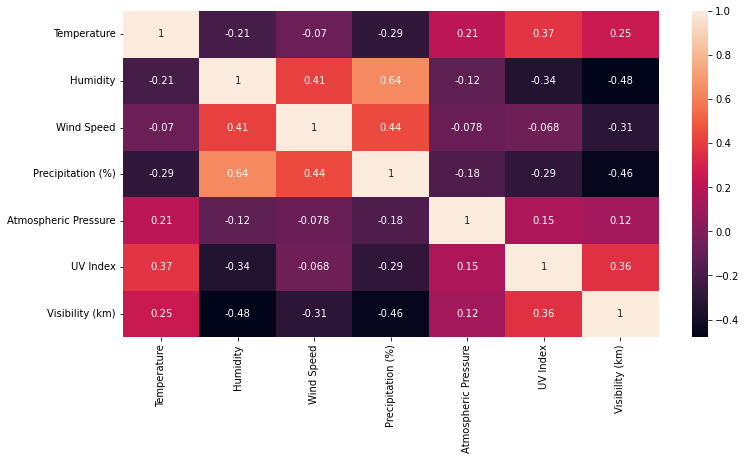

In [26]:
plt.figure(figsize=(12,6)) # checking for any correlation present between the independent variables.
sns.heatmap(df.corr(),annot=True)  # as we can see there is not much of a strong relation between them.
plt.show()

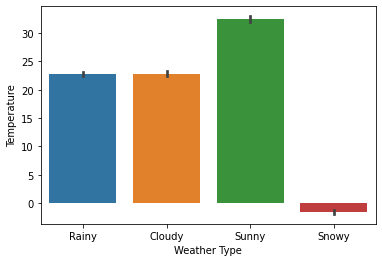

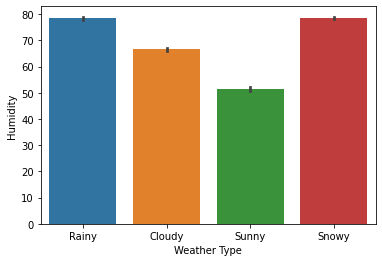

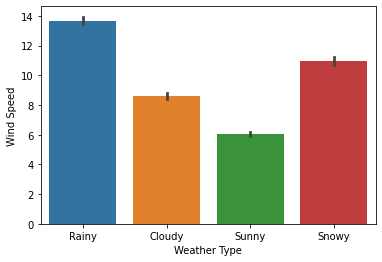

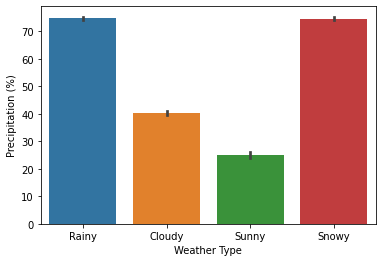

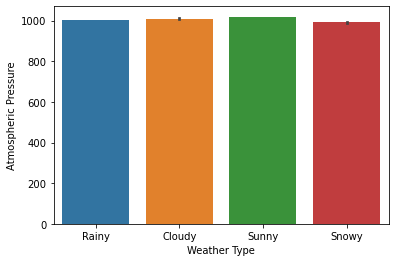

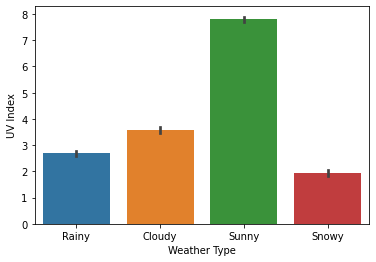

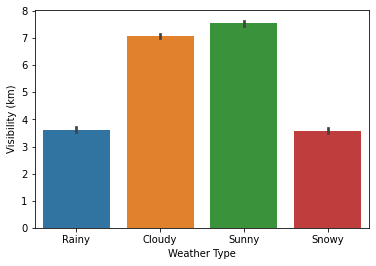

In [27]:
for i in df_num.columns: # using for loop plotting bar plots for each numeric columnn with respect to target column
    sns.barplot(x=df['Weather Type'],y=df_num[i])
    plt.show()

<AxesSubplot:xlabel='Weather Type', ylabel='Temperature'>

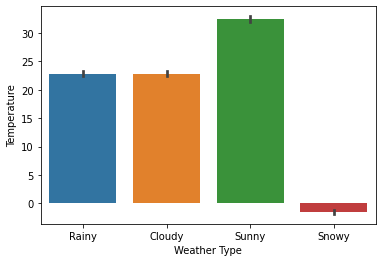

In [28]:
sns.barplot(df['Weather Type'],df['Temperature'])
# by seeing at the plot we can naturally get that we have high temperature in sunny weather, approximate same temperature
# in rainy and cloudy days and low temperature in snowy days.

<AxesSubplot:xlabel='Weather Type', ylabel='Humidity'>

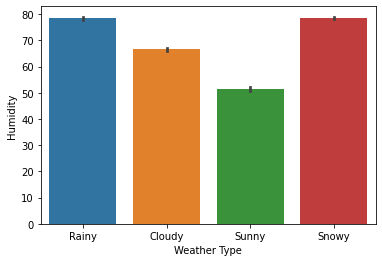

In [29]:
sns.barplot(df['Weather Type'],df['Humidity'])

# as we can see that in snowy and rainy weathers we have high Humidity in the atmoshere compared to the cloudy and sunny days.

<AxesSubplot:xlabel='Weather Type', ylabel='Wind Speed'>

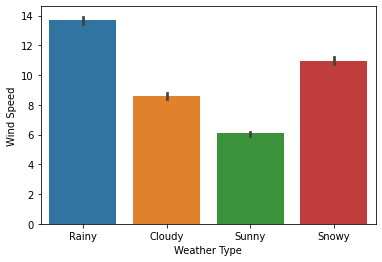

In [30]:
sns.barplot(df['Weather Type'],df['Wind Speed'])
# As we can see that in rainy weather the wind speed is too high, then somewhat less in snowy weather
# in sunny and cloudy weather we have less wind speed.

<AxesSubplot:xlabel='Weather Type', ylabel='Precipitation (%)'>

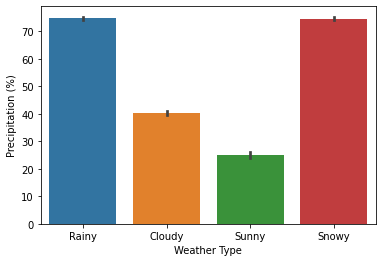

In [31]:
sns.barplot(df['Weather Type'],df['Precipitation (%)'])
# by looking at the plot we can say that in snowy and rainy weather the percentage of precipitation is above 70%
# where as in cloudy and sunny weather the percentage of precipitation is less than 40%

<AxesSubplot:xlabel='Weather Type', ylabel='Atmospheric Pressure'>

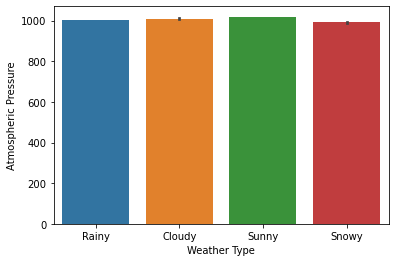

In [32]:
sns.barplot(df['Weather Type'],df['Atmospheric Pressure'])
# atmosheric pressure is almost same for all the weather type we have 
# there is no significant information to say.

<AxesSubplot:xlabel='Weather Type', ylabel='UV Index'>

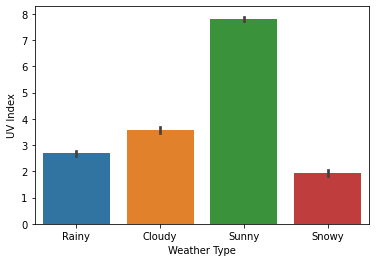

In [33]:
sns.barplot(df['Weather Type'],df['UV Index'])

# here we can see that in sunny weather we have high UV index followed by clody,rainy and snowy
# mostly depends on visibility of sun.

<AxesSubplot:xlabel='Weather Type', ylabel='Visibility (km)'>

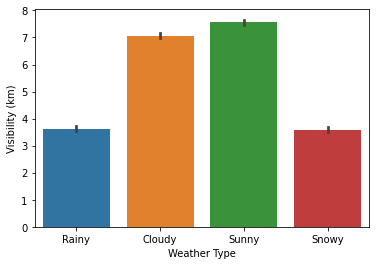

In [34]:
sns.barplot(df['Weather Type'],df['Visibility (km)'])
# in Sunny and Cloudy weather the visibility is greater than 7KM but in rainy and snowy weather the visibility decreased
# to less than 4KM.

In [35]:
for i in df_cat.columns: # creating frequency table for each categorical column with our target column.
    print(i)
    print(pd.DataFrame(pd.crosstab(df['Weather Type'],df_cat[i])))
    print()
    print()

Cloud Cover
Cloud Cover   clear  cloudy  overcast  partly cloudy
Weather Type                                        
Cloudy            0      92      1305           1903
Rainy             0     105      2193           1002
Snowy             0     107      2489            704
Sunny          2139     107       103            951


Season
Season        Autumn  Spring  Summer  Winter
Weather Type                                
Cloudy           806     850     766     878
Rainy            796     831     820     853
Snowy             69      80      65    3086
Sunny            829     837     841     793


Location
Location      coastal  inland  mountain
Weather Type                           
Cloudy           1106    1107      1087
Rainy            1216    1069      1015
Snowy             120    1575      1605
Sunny            1129    1065      1106


Weather Type
Weather Type  Cloudy  Rainy  Snowy  Sunny
Weather Type                             
Cloudy          3300      0      0      0

Cloud Cover


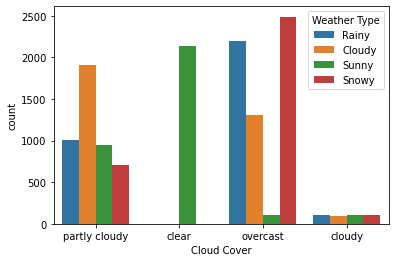

Season


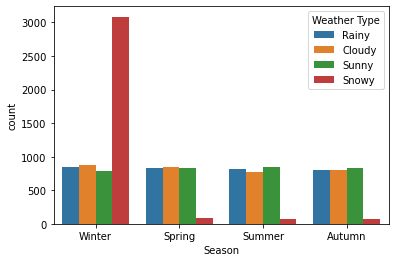

Location


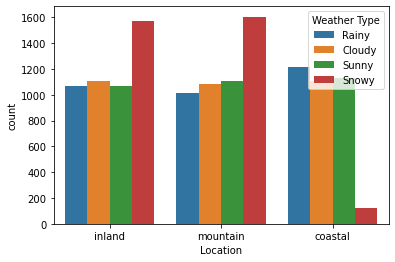

Weather Type


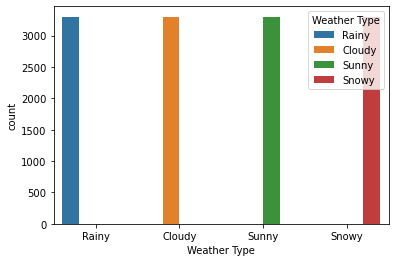

In [36]:
for i in df_cat.columns:
    print(i)
    sns.countplot(df_cat[i],hue=df['Weather Type'])
    plt.show()

# Outlier Analysis and Treatment

Temparature

<AxesSubplot:xlabel='Temperature'>

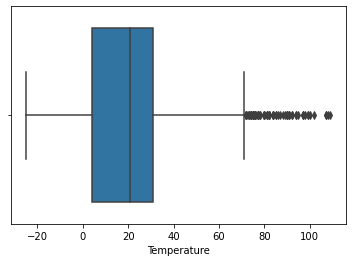

In [37]:
sns.boxplot(df['Temperature'])

In [38]:
IQR=df['Temperature'].quantile(0.75) -df['Temperature'].quantile(0.25)
df['Temperature'].quantile(0.75) + 1.5*IQR

71.5

In [39]:
len(df[df['Temperature']>71.5])/len(df)*100

0.6969696969696969

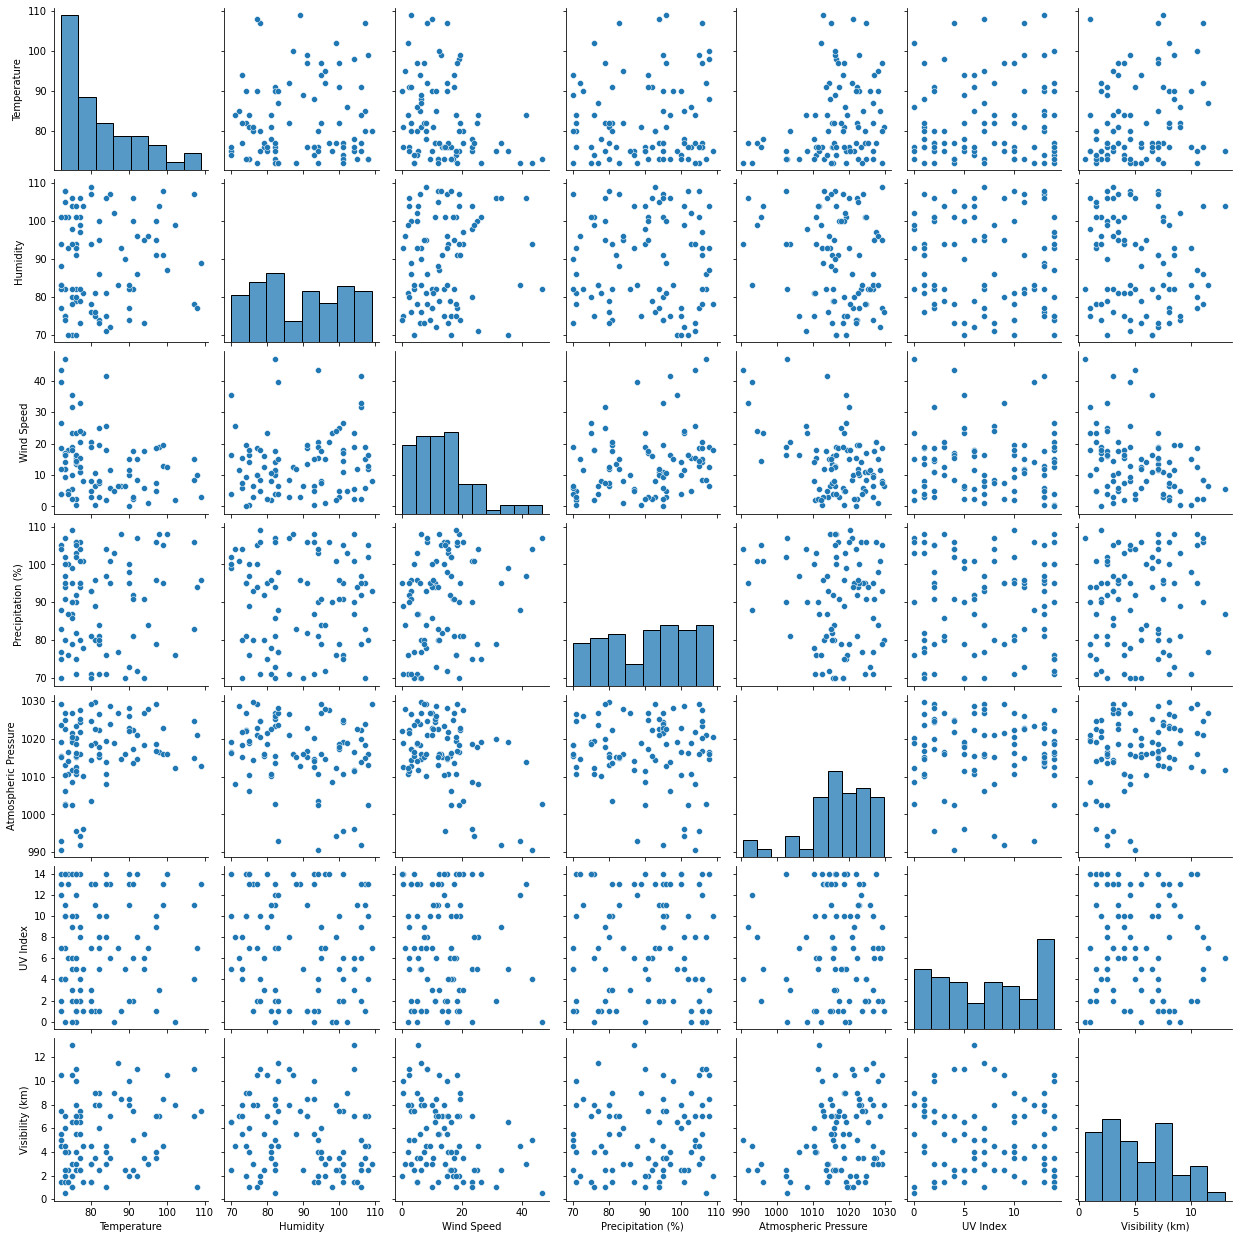

In [40]:
sns.pairplot(df[df['Temperature']>71.5])

In [41]:
for i in df_cat.columns:
    print(i)
    a=df[df['Temperature']>71.5][i].value_counts()/len(df[df['Temperature']>71.5])*100
    print(a)
    print()
    print()

Cloud Cover
clear            57.608696
partly cloudy    23.913043
overcast         18.478261
Name: Cloud Cover, dtype: float64


Season
Spring    29.347826
Summer    26.086957
Winter    22.826087
Autumn    21.739130
Name: Season, dtype: float64


Location
coastal     43.478261
inland      30.434783
mountain    26.086957
Name: Location, dtype: float64


Weather Type
Sunny     73.913043
Rainy     18.478261
Cloudy     7.608696
Name: Weather Type, dtype: float64




Humidity

<AxesSubplot:xlabel='Humidity'>

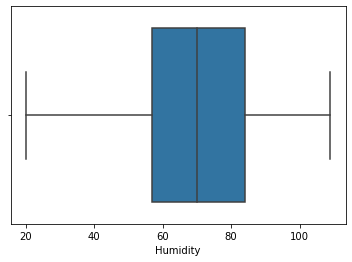

In [42]:
sns.boxplot(df['Humidity'])

Wind Speed

<AxesSubplot:xlabel='Wind Speed'>

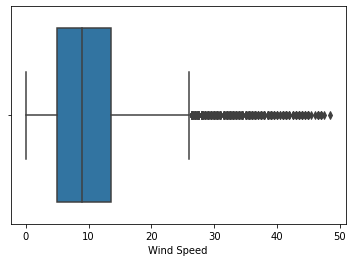

In [43]:
sns.boxplot(df['Wind Speed'])

In [44]:
IQR=df['Wind Speed'].quantile(0.75) -df['Wind Speed'].quantile(0.25)
df['Wind Speed'].quantile(0.75) + 1.5*IQR

26.25

In [45]:
len(df[df['Wind Speed']>26.25])/len(df)*100

3.0606060606060606

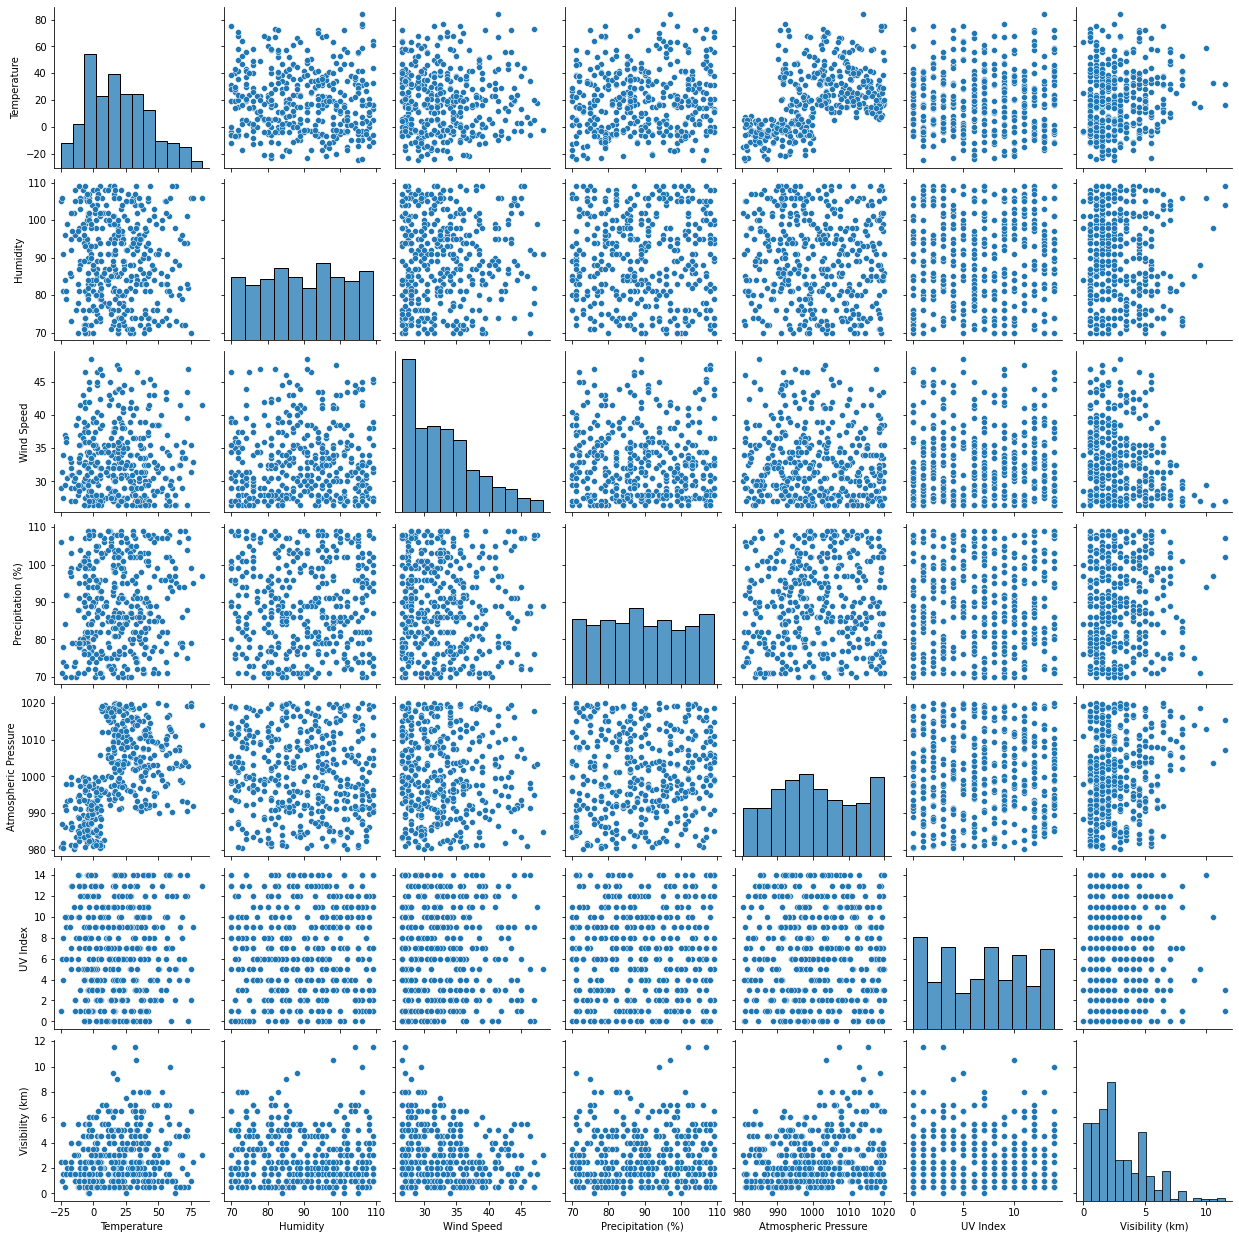

In [46]:
sns.pairplot(df[df['Wind Speed']>26.25])

In [47]:
for i in df_cat.columns:
    print(i)
    a=df[df['Wind Speed']>26.25][i].value_counts()/len(df[df['Wind Speed']>26.25])*100
    print(a)
    print()
    print()

Cloud Cover
overcast         64.60396
partly cloudy    35.39604
Name: Cloud Cover, dtype: float64


Season
Winter    51.732673
Autumn    17.821782
Summer    17.079208
Spring    13.366337
Name: Season, dtype: float64


Location
inland      41.336634
mountain    38.861386
coastal     19.801980
Name: Location, dtype: float64


Weather Type
Rainy     49.257426
Snowy     35.643564
Cloudy    15.099010
Name: Weather Type, dtype: float64




In [48]:
# outliers in wind speed have relation with cloud cover and season columns. so no treatment required for this column

Precipitation (%)

<AxesSubplot:xlabel='Precipitation (%)'>

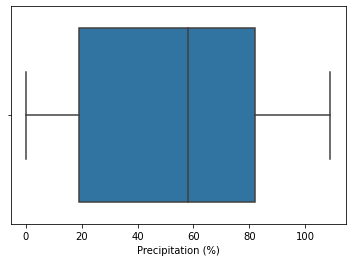

In [49]:
sns.boxplot(df['Precipitation (%)'])

Atmosheric Pressure

<AxesSubplot:xlabel='Atmospheric Pressure'>

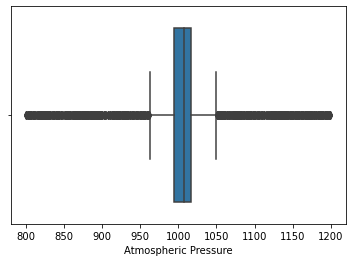

In [50]:
sns.boxplot(df['Atmospheric Pressure'])

In [51]:
IQR=df['Atmospheric Pressure'].quantile(0.75) -df['Atmospheric Pressure'].quantile(0.25)
print('UL is : ',df['Atmospheric Pressure'].quantile(0.75) + 1.5*IQR)
print('LL is : ',df['Atmospheric Pressure'].quantile(0.25) - 1.5*IQR)

UL is :  1049.7312500000003
LL is :  961.8412499999998


In [52]:
len(df[(df['Atmospheric Pressure']<961.8)|(df['Atmospheric Pressure']>1049.7)])/len(df)*100

7.0227272727272725

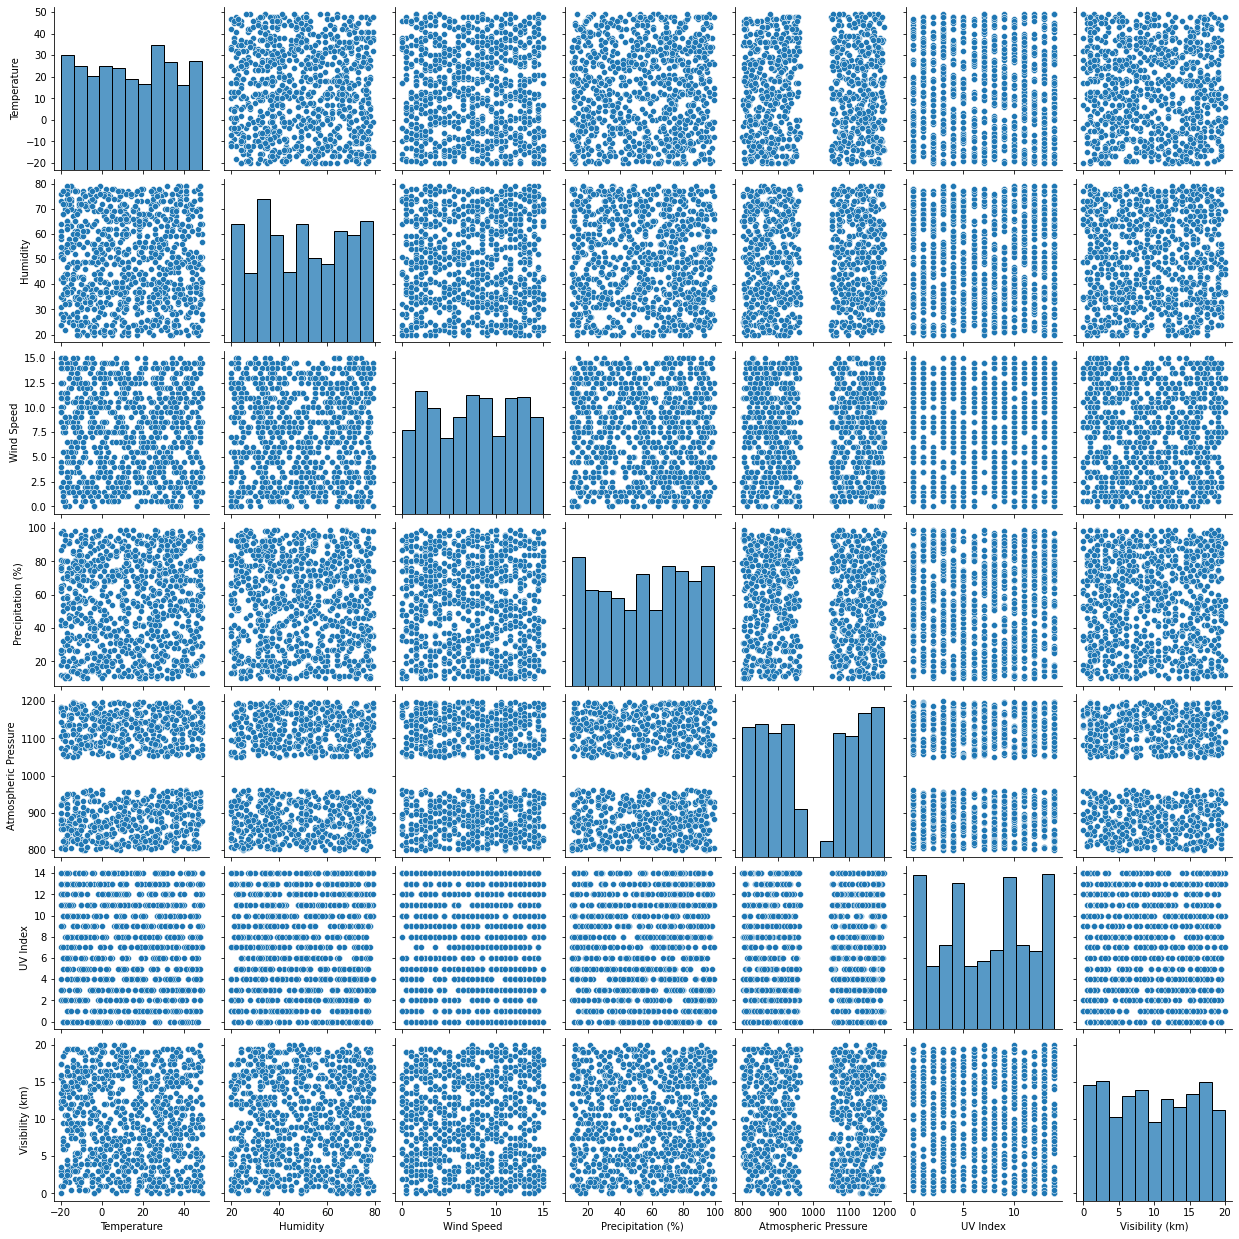

In [53]:
sns.pairplot(df[(df['Atmospheric Pressure']<961.8)|(df['Atmospheric Pressure']>1049.7)])

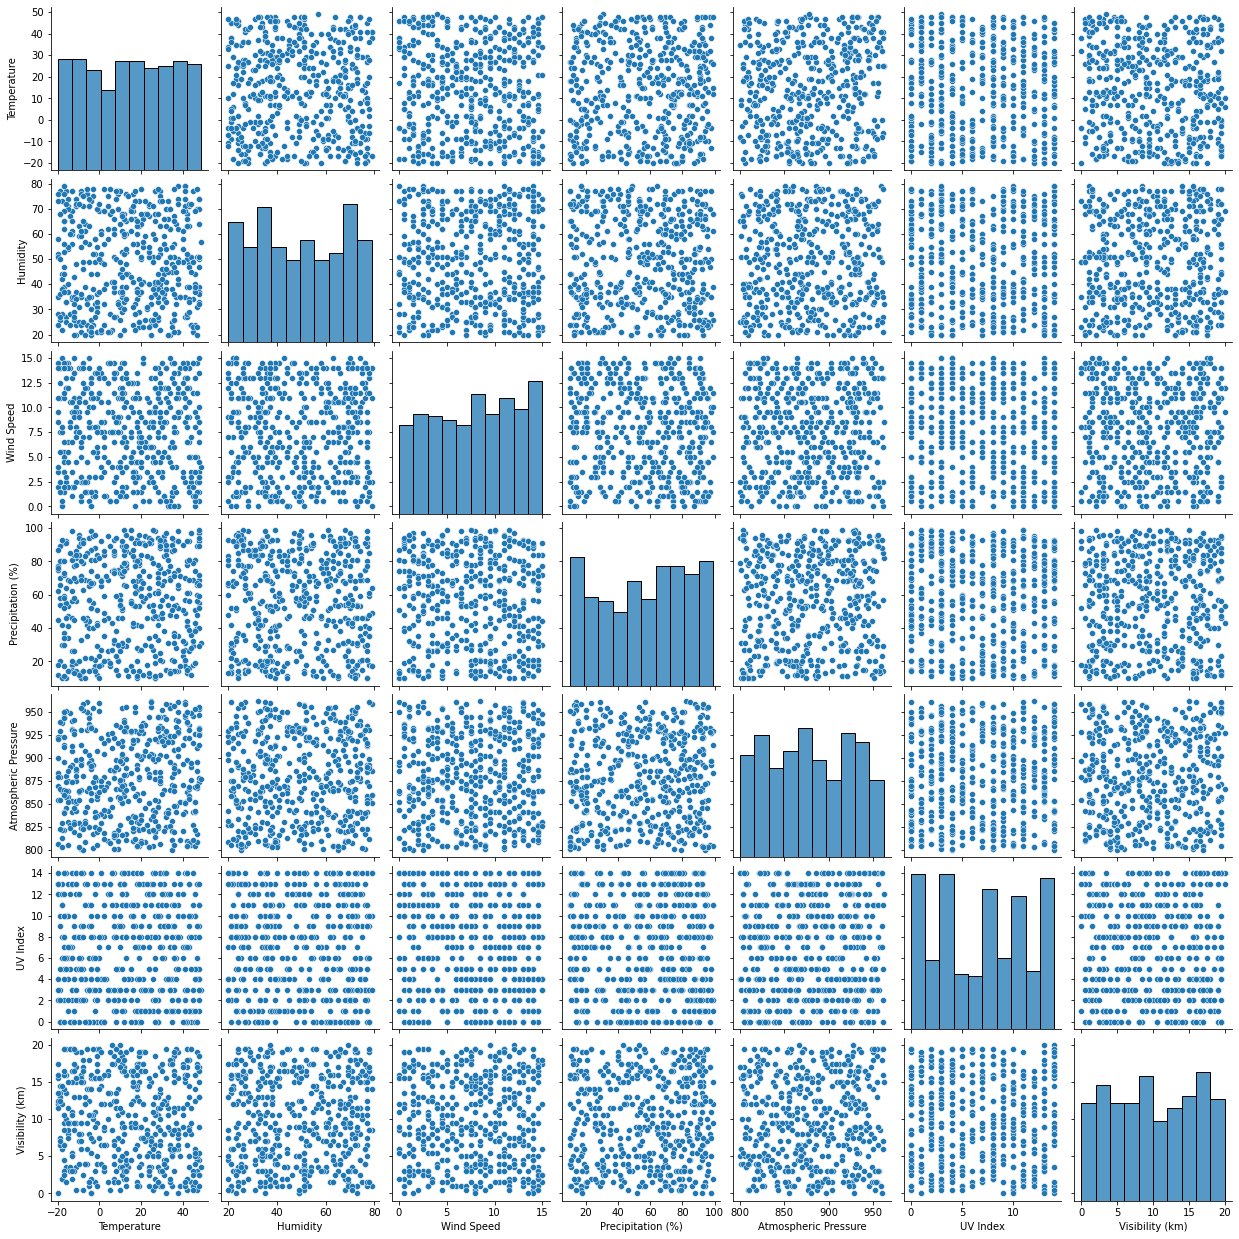

In [54]:
sns.pairplot(df[(df['Atmospheric Pressure']<961.8)])

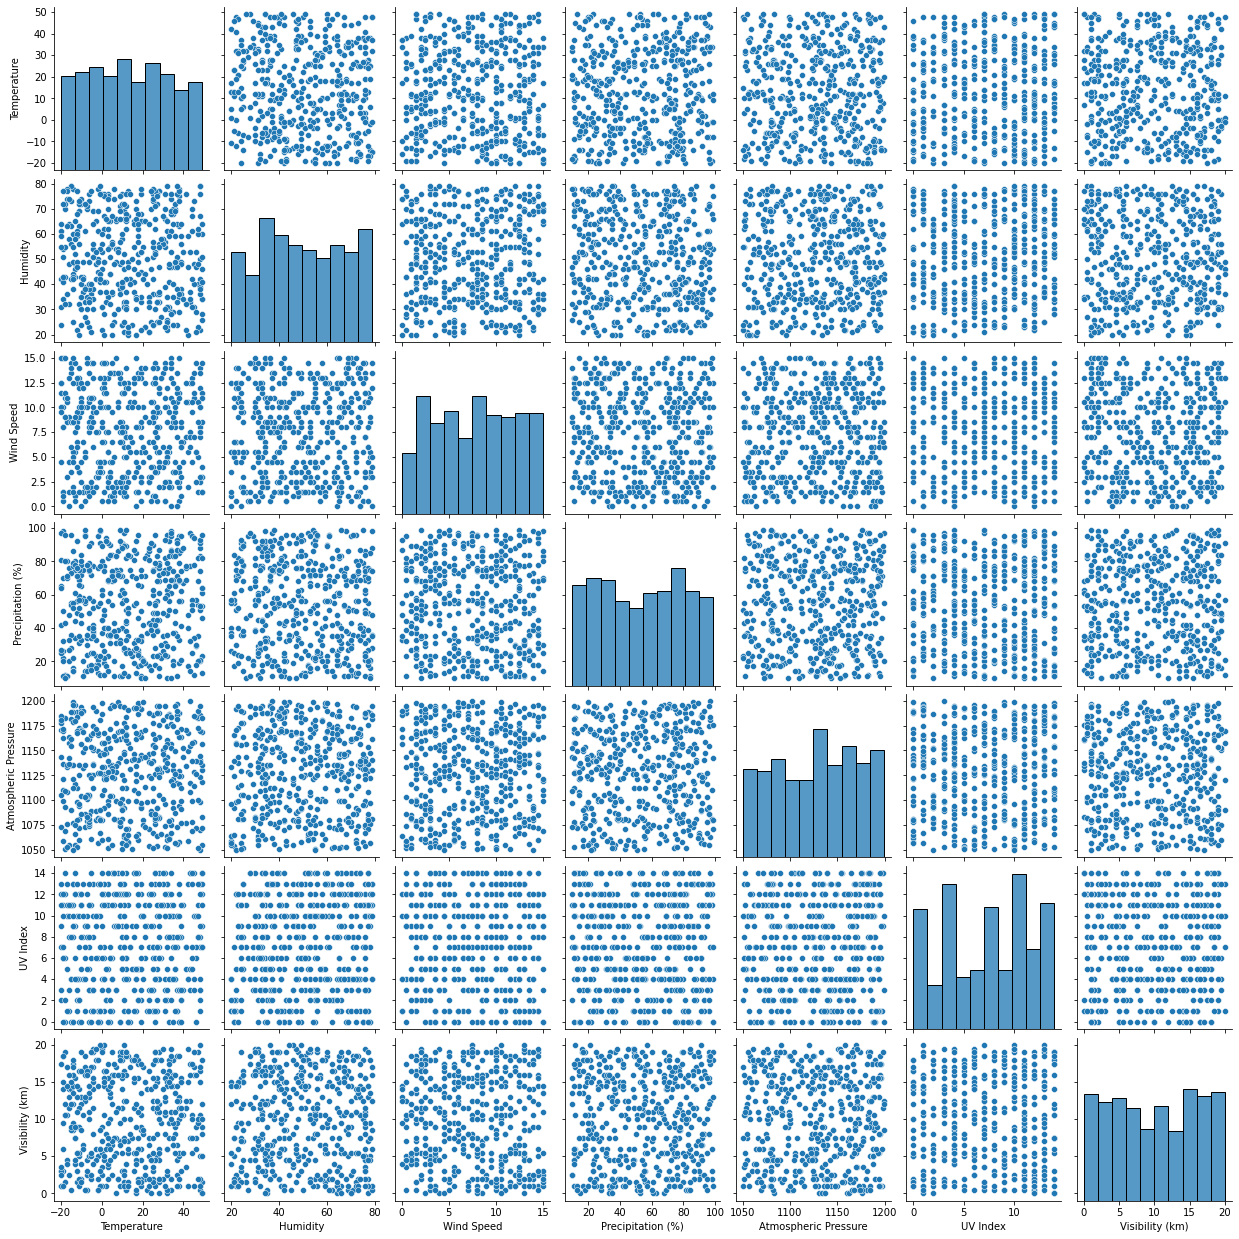

In [55]:
sns.pairplot(df[(df['Atmospheric Pressure']>1049.7)])

In [56]:
for i in df_cat.columns:
    print(i)
    a=df[(df['Atmospheric Pressure']<961.8)|(df['Atmospheric Pressure']>1049.7)][i].value_counts()/len(df[(df['Atmospheric Pressure']<961.8)|(df['Atmospheric Pressure']>1049.7)])*100
    print(a)
    print()
    print()

Cloud Cover
cloudy           35.275081
overcast         33.549083
partly cloudy    31.175836
Name: Cloud Cover, dtype: float64


Season
Spring    27.723840
Winter    26.321467
Autumn    24.811219
Summer    21.143474
Name: Season, dtype: float64


Location
coastal     35.706580
mountain    32.901834
inland      31.391586
Name: Location, dtype: float64


Weather Type
Sunny     26.860841
Rainy     25.889968
Snowy     24.163970
Cloudy    23.085221
Name: Weather Type, dtype: float64




Visibility (km)

<AxesSubplot:xlabel='Visibility (km)'>

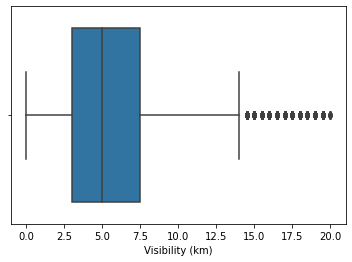

In [57]:
sns.boxplot(df['Visibility (km)'])

In [58]:
IQR=df['Visibility (km)'].quantile(0.75) -df['Visibility (km)'].quantile(0.25)
print('UL is : ',df['Visibility (km)'].quantile(0.75) + 1.5*IQR)

UL is :  14.25


In [59]:
len(df[df['Visibility (km)']>14.25])/len(df)*100

2.9015151515151514

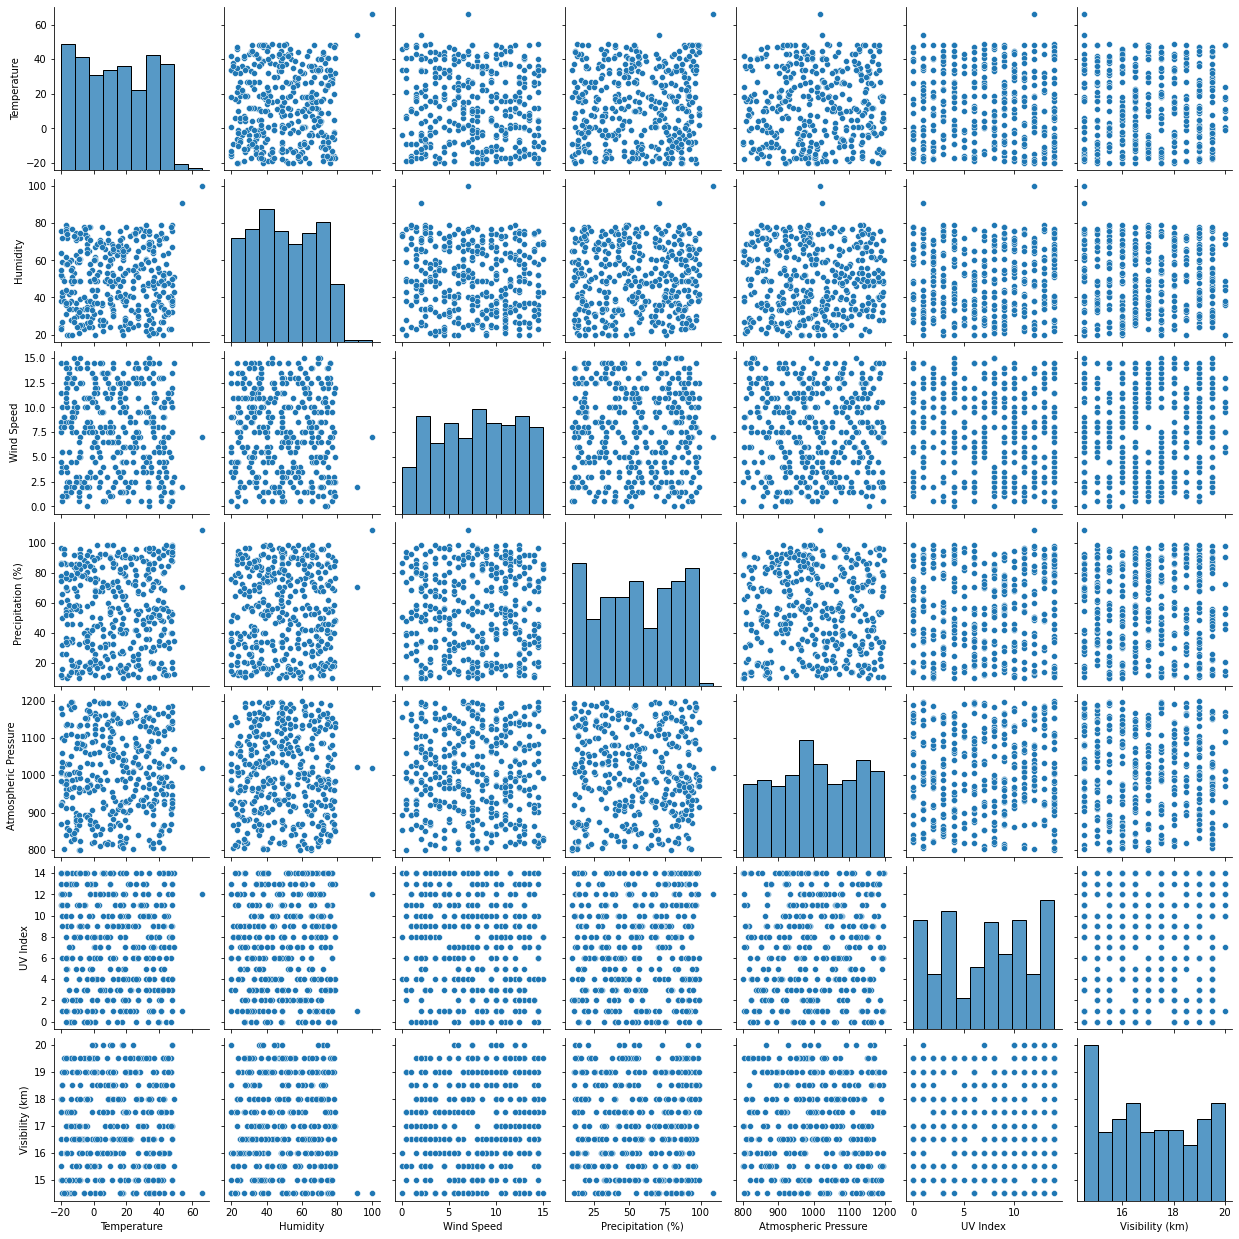

In [60]:
sns.pairplot(df[df['Visibility (km)']>14.25])

In [61]:
for i in df_cat.columns:
    print(i)
    a=df[df['Visibility (km)']>14.25][i].value_counts()/len(df[df['Visibility (km)']>14.25])*100
    print(a)
    print()
    print()

Cloud Cover
partly cloudy    33.159269
overcast         33.159269
cloudy           33.159269
clear             0.522193
Name: Cloud Cover, dtype: float64


Season
Autumn    28.198433
Spring    25.587467
Winter    24.281984
Summer    21.932115
Name: Season, dtype: float64


Location
coastal     34.725849
mountain    33.681462
inland      31.592689
Name: Location, dtype: float64


Weather Type
Snowy     28.459530
Rainy     26.370757
Sunny     24.020888
Cloudy    21.148825
Name: Weather Type, dtype: float64




# Encoding Categoric Variables

In [62]:
from sklearn.preprocessing import LabelEncoder # importing label encoder and loading it.
le = LabelEncoder()

In [63]:
df_enc= pd.DataFrame()  # applying label encoding to our categorical data and creating a dataframe of encoded columns
for i in df_cat.columns:
    df_enc[i] = le.fit_transform(df_cat[i])

In [64]:
df_enc # encoded dataframe

Cloud Cover  Season  Location  Weather Type
0                3       3         1             1
1                3       1         1             0
2                0       1         2             3
3                0       1         0             3
4                2       3         2             1
...            ...     ...       ...           ...
13195            2       2         2             1
13196            1       3         0             2
13197            2       0         0             0
13198            2       3         1             2
13199            2       0         2             1

[13200 rows x 4 columns]

# Feature Scaling

In [65]:
from sklearn.preprocessing import MinMaxScaler

In [66]:
df_scaled = pd.DataFrame()

In [67]:
df_num.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Atmospheric Pressure', 'UV Index', 'Visibility (km)'],
      dtype='object')

Temparature

In [68]:
print(df['Temperature'].min())
print(df['Temperature'].max())

-25.0
109.0


In [69]:
mm=MinMaxScaler(feature_range=(-1,5))

df_scaled['Temparature']=pd.DataFrame(mm.fit_transform(df[['Temperature']]))

In [70]:
df_scaled.describe()

Temparature
count  13200.000000
mean       0.975862
std        0.778492
min       -1.000000
25%        0.298507
50%        1.059701
75%        1.507463
max        5.000000

Humidity

In [71]:
print(df['Humidity'].min())
print(df['Humidity'].max())

20
109


In [72]:
mm=MinMaxScaler(feature_range=(0,5))
df_scaled['Humidity']=pd.DataFrame(mm.fit_transform(df[['Humidity']]))

In [73]:
df_scaled.describe()

Temparature      Humidity
count  13200.000000  13200.000000
mean       0.975862      2.736564
std        0.778492      1.134508
min       -1.000000      0.000000
25%        0.298507      2.078652
50%        1.059701      2.808989
75%        1.507463      3.595506
max        5.000000      5.000000

Wind Speed

In [74]:
print(df['Wind Speed'].min())
print(df['Wind Speed'].max())

0.0
48.5


In [75]:
mm=MinMaxScaler(feature_range=(0,5))
df_scaled['Wind Speed']=pd.DataFrame(mm.fit_transform(df[['Wind Speed']]))

In [76]:
df_scaled.describe()

Temparature      Humidity    Wind Speed
count  13200.000000  13200.000000  13200.000000
mean       0.975862      2.736564      1.013629
std        0.778492      1.134508      0.712238
min       -1.000000      0.000000      0.000000
25%        0.298507      2.078652      0.515464
50%        1.059701      2.808989      0.927835
75%        1.507463      3.595506      1.391753
max        5.000000      5.000000      5.000000

Precipitation (%)

In [77]:
print(df['Precipitation (%)'].min())
print(df['Precipitation (%)'].max())

0.0
109.0


In [78]:
mm=MinMaxScaler(feature_range=(0,1))
df_scaled['Precipitation']=pd.DataFrame(mm.fit_transform(df[['Precipitation (%)']]))

In [79]:
df_scaled.describe()

Temparature      Humidity    Wind Speed  Precipitation
count  13200.000000  13200.000000  13200.000000   13200.000000
mean       0.975862      2.736564      1.013629       0.492150
std        0.778492      1.134508      0.712238       0.293088
min       -1.000000      0.000000      0.000000       0.000000
25%        0.298507      2.078652      0.515464       0.174312
50%        1.059701      2.808989      0.927835       0.532110
75%        1.507463      3.595506      1.391753       0.752294
max        5.000000      5.000000      5.000000       1.000000

Atmospheric Pressure

In [80]:
print(df['Atmospheric Pressure'].min())
print(df['Atmospheric Pressure'].max())

800.12
1199.21


In [81]:
mm=MinMaxScaler(feature_range=(1,13))
df_scaled['Atmospheric Pressure']=pd.DataFrame(mm.fit_transform(df[['Atmospheric Pressure']]))

In [82]:
df_scaled.describe()

Temparature      Humidity    Wind Speed  Precipitation  \
count  13200.000000  13200.000000  13200.000000   13200.000000   
mean       0.975862      2.736564      1.013629       0.492150   
std        0.778492      1.134508      0.712238       0.293088   
min       -1.000000      0.000000      0.000000       0.000000   
25%        0.298507      2.078652      0.515464       0.174312   
50%        1.059701      2.808989      0.927835       0.532110   
75%        1.507463      3.595506      1.391753       0.752294   
max        5.000000      5.000000      5.000000       1.000000   

       Atmospheric Pressure  
count          13200.000000  
mean               7.185308  
std                1.118532  
min                1.000000  
25%                6.853717  
50%                7.240096  
75%                7.514395  
max               13.000000

UV Index

In [83]:
df['UV Index'].value_counts() # it is a quantitative data no need of scaling

1     2837
0     2097
2     1465
3     1432
4      831
5      591
11     582
10     577
9      572
7      543
8      532
6      524
12     218
14     210
13     189
Name: UV Index, dtype: int64

In [84]:
df_scaled['UV Index'] = df['UV Index']

In [85]:
df_scaled.describe()

Temparature      Humidity    Wind Speed  Precipitation  \
count  13200.000000  13200.000000  13200.000000   13200.000000   
mean       0.975862      2.736564      1.013629       0.492150   
std        0.778492      1.134508      0.712238       0.293088   
min       -1.000000      0.000000      0.000000       0.000000   
25%        0.298507      2.078652      0.515464       0.174312   
50%        1.059701      2.808989      0.927835       0.532110   
75%        1.507463      3.595506      1.391753       0.752294   
max        5.000000      5.000000      5.000000       1.000000   

       Atmospheric Pressure      UV Index  
count          13200.000000  13200.000000  
mean               7.185308      4.005758  
std                1.118532      3.856600  
min                1.000000      0.000000  
25%                6.853717      1.000000  
50%                7.240096      3.000000  
75%                7.514395      7.000000  
max               13.000000     14.000000

Visibility (km)

In [86]:
print(df['Visibility (km)'].min())
print(df['Visibility (km)'].max())

0.0
20.0


In [87]:
mm=MinMaxScaler(feature_range=(0,5))
df_scaled['Visibility (km)']=pd.DataFrame(mm.fit_transform(df[['Visibility (km)']]))

In [88]:
df_scaled.describe()

Temparature      Humidity    Wind Speed  Precipitation  \
count  13200.000000  13200.000000  13200.000000   13200.000000   
mean       0.975862      2.736564      1.013629       0.492150   
std        0.778492      1.134508      0.712238       0.293088   
min       -1.000000      0.000000      0.000000       0.000000   
25%        0.298507      2.078652      0.515464       0.174312   
50%        1.059701      2.808989      0.927835       0.532110   
75%        1.507463      3.595506      1.391753       0.752294   
max        5.000000      5.000000      5.000000       1.000000   

       Atmospheric Pressure      UV Index  Visibility (km)  
count          13200.000000  13200.000000     13200.000000  
mean               7.185308      4.005758         1.365729  
std                1.118532      3.856600         0.842875  
min                1.000000      0.000000         0.000000  
25%                6.853717      1.000000         0.750000  
50%                7.240096      3.000000         1.250000  
75%                7.514395      7.000000         1.875000  
max               13.000000     14.000000         5.000000

# Model Building

In [89]:
df_final=pd.concat([df_num,df_enc],axis=1)
df_final.head()

Temperature  Humidity  Wind Speed  Precipitation (%)  Atmospheric Pressure  \
0         14.0        73         9.5               82.0               1010.82   
1         39.0        96         8.5               71.0               1011.43   
2         30.0        64         7.0               16.0               1018.72   
3         38.0        83         1.5               82.0               1026.25   
4         27.0        74        17.0               66.0                990.67   

   UV Index  Visibility (km)  Cloud Cover  Season  Location  Weather Type  
0         2              3.5            3       3         1             1  
1         7             10.0            3       1         1             0  
2         5              5.5            0       1         2             3  
3         7              1.0            0       1         0             3  
4         1              2.5            2       3         2             1

In [90]:
df_final_scaled=pd.concat([df_scaled,df_enc],axis=1)
df_final_scaled.head()

Temparature  Humidity  Wind Speed  Precipitation  Atmospheric Pressure  \
0     0.746269  2.977528    0.979381       0.752294              7.335413   
1     1.865672  4.269663    0.876289       0.651376              7.353755   
2     1.462687  2.471910    0.721649       0.146789              7.572953   
3     1.820896  3.539326    0.154639       0.752294              7.799369   
4     1.328358  3.033708    1.752577       0.605505              6.729535   

   UV Index  Visibility (km)  Cloud Cover  Season  Location  Weather Type  
0         2            0.875            3       3         1             1  
1         7            2.500            3       1         1             0  
2         5            1.375            0       1         2             3  
3         7            0.250            0       1         0             3  
4         1            0.625            2       3         2             1

In [91]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization,Flatten,LeakyReLU
from tensorflow.keras import optimizers,regularizers
from tensorflow.keras.optimizers import Adam,SGD,RMSprop,Adamax,Nadam
from tensorflow.keras.activations import linear,softplus,softmax
from tensorflow.keras.utils import to_categorical

In [92]:
x=df_final.drop(columns='Weather Type')
y=df_final['Weather Type']

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

In [93]:
xtrain.shape

(10560, 10)

In [94]:
ytrain = to_categorical(ytrain,num_classes=4)
ytest = to_categorical(ytest,num_classes=4)

In [95]:
model = Sequential()
model.add(Flatten())
model.add(Dense(256,input_shape=(1024,),activation ='relu'))
model.add(BatchNormalization())
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(4,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(xtrain,ytrain,epochs=50,batch_size=50,validation_data=(xtest,ytest))

Epoch 1/50
212/212 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7872 - loss: 0.6388 - val_accuracy: 0.5705 - val_loss: 1.0161
Epoch 2/50
212/212 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8836 - loss: 0.3574 - val_accuracy: 0.6769 - val_loss: 1.1458
Epoch 3/50
212/212 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8814 - loss: 0.3436 - val_accuracy: 0.6534 - val_loss: 1.5038
Epoch 4/50
212/212 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8867 - loss: 0.3296 - val_accuracy: 0.7045 - val_loss: 0.7881
Epoch 5/50
212/212 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8892 - loss: 0.3074 - val_accuracy: 0.7905 - val_loss: 0.5712
Epoch 6/50
212/212 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8912 - loss: 0.3085 - val_accuracy: 0.8189 - val_loss: 0.5620
Epoch 7/50
212/212 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8992 - loss: 0.2847 - val_accuracy: 0.7220 - val_loss: 0.7197
Epoch 8/50
212/212 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8983 - loss: 0.2856 - val_accuracy: 0.

In [96]:
loss, accuracy = model.evaluate(xtest, ytest)
print(f'Test Accuracy: {accuracy:.2f}')

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - accuracy: 0.8017 - loss: 0.5824
Test Accuracy: 0.80


In [97]:
df_final_scaled

Temparature  Humidity  Wind Speed  Precipitation  Atmospheric Pressure  \
0         0.746269  2.977528    0.979381       0.752294              7.335413   
1         1.865672  4.269663    0.876289       0.651376              7.353755   
2         1.462687  2.471910    0.721649       0.146789              7.572953   
3         1.820896  3.539326    0.154639       0.752294              7.799369   
4         1.328358  3.033708    1.752577       0.605505              6.729535   
...            ...       ...         ...            ...                   ...   
13195     0.567164  3.033708    1.494845       0.651376              7.104788   
13196     0.074627  3.146067    0.360825       0.211009              9.031572   
13197     1.462687  3.202247    0.567010       0.256881              7.391641   
13198     0.253731  3.146067    1.030928       0.862385              6.537097   
13199    -0.104478  1.011236    0.000000       0.844037              7.472224   

       UV Index  Visibility (km)  Cloud Cover  Season  Location  Weather Type  
0             2            0.875            3       3         1             1  
1             7            2.500            3       1         1             0  
2             5            1.375            0       1         2             3  
3             7            0.250            0       1         0             3  
4             1            0.625            2       3         2             1  
...         ...              ...          ...     ...       ...           ...  
13195         1            0.250            2       2         2             1  
13196         1            1.500            1       3         0             2  
13197         3            2.250            2       0         0             0  
13198         0            0.500            2       3         1             2  
13199         5            2.500            2       0         2             1  

[13200 rows x 11 columns]

In [98]:
x=df_final_scaled.drop(columns='Weather Type')
y=df_final_scaled['Weather Type']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [99]:
y_train = to_categorical(y_train,num_classes=4)
y_test = to_categorical(y_test,num_classes=4)

In [100]:
model1 = Sequential()
model1.add(Flatten())
model1.add(Dense(256,input_shape=(1024,),activation ='relu'))
model1.add(BatchNormalization())
model1.add(Dense(128,activation='relu'))
model1.add(BatchNormalization())
model1.add(Dense(4,activation='softmax'))
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model1.fit(x_train,y_train,epochs=50,batch_size=50,validation_data=(x_test,y_test))

Epoch 1/50
212/212 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8262 - loss: 0.5283 - val_accuracy: 0.8527 - val_loss: 0.5068
Epoch 2/50
212/212 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8945 - loss: 0.3019 - val_accuracy: 0.9004 - val_loss: 0.2872
Epoch 3/50
212/212 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8992 - loss: 0.2793 - val_accuracy: 0.9004 - val_loss: 0.2599
Epoch 4/50
212/212 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8998 - loss: 0.2574 - val_accuracy: 0.9008 - val_loss: 0.2660
Epoch 5/50
212/212 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9011 - loss: 0.2560 - val_accuracy: 0.9102 - val_loss: 0.2470
Epoch 6/50
212/212 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9085 - loss: 0.2403 - val_accuracy: 0.9023 - val_loss: 0.2513
Epoch 7/50
212/212 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9134 - loss: 0.2183 - val_accuracy: 0.9049 - val_loss: 0.2548
Epoch 8/50
212/212 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9110 - loss: 0.2144 - val_accuracy: 0.

In [101]:
loss, accuracy = model1.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - accuracy: 0.8945 - loss: 0.3706
Test Accuracy: 0.90


In [102]:
from sklearn.metrics import classification_report

In [103]:
y_pred=model1.predict(x_test)

y_pred = (y_pred > 0.5).astype(int)

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [104]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       632
           1       0.93      0.86      0.90       682
           2       0.93      0.93      0.93       699
           3       0.97      0.88      0.92       627

   micro avg       0.92      0.89      0.91      2640
   macro avg       0.92      0.89      0.91      2640
weighted avg       0.92      0.89      0.91      2640
 samples avg       0.89      0.89      0.89      2640



#  Model Interpretation

# problem Statement 

# Dataset Overview:
**Features:**

**Temperature (numeric):** The temperature in degrees Celsius, ranging from extreme cold to extreme heat.

**Humidity (numeric):** The humidity percentage, including values above 100% to introduce outliers.

**Wind Speed (numeric):** The wind speed in kilometers per hour, with a range including unrealistically high values.

**Precipitation (%) (numeric):** The precipitation percentage, including outlier values.

**Cloud Cover (categorical):** The cloud cover description.

**Atmospheric Pressure (numeric):** The atmospheric pressure in hPa, covering a wide range.

**UV Index (numeric):** The UV index, indicating the strength of ultraviolet radiation.

**Season (categorical):** The season during which the data was recorded.

**Visibility (km) (numeric):** The visibility in kilometers, including very low or very high values.

**Location (categorical):** The type of location where the data was recorded.

**Target:**

**Weather Type (categorical):** The target variable for classification, indicating the weather type.

**Model Used:** ANN Clasificattion

 #  Steps for Model Interpretation:

### Data Preparation

split the data which is already pre-processed in EDA as indipendent variables as 'x' and dependent variable as 'y'
Then Doing Train_test_split to use some data for training and some for testing.

ytrain,ytest are converted to one-hot encoded vectors with `num_classes=4`. This is necessary for the categorical classification.

### Model Construction

1. **Sequential Model:**
   - `model1 = Sequential()`: Initializes a Sequential model.

2. **Flatten Layer:**
   - `model1.add(Flatten())`: Flattens the input, transforming it into a 1D array.

3. **Dense Layer 1:**
   - `model1.add(Dense(256, input_shape=(1024,), activation='relu'))`: 
     - A dense (fully connected) layer with 256 neurons.
     - `input_shape=(1024,)` indicates that the input features have 1024 dimensions.
     - Uses the ReLU activation function.

4. **Batch Normalization 1:**
   - `model1.add(BatchNormalization())`: Normalizes the outputs of the previous layer to improve training stability and speed.

5. **Dense Layer 2:**
   - `model1.add(Dense(128, activation='relu'))`: 
     - A dense layer with 128 neurons.
     - Uses the ReLU activation function.

6. **Batch Normalization 2:**
   - `model1.add(BatchNormalization())`: Normalizes the outputs of the previous layer.

7. **Output Layer:**
   - `model1.add(Dense(4, activation='softmax'))`: 
     - A dense layer with 4 neurons (one for each class).
     - Uses the softmax activation function to output probabilities for each class.

8. **Compile Model:**
   - `model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])`: 
     - Uses the Adam optimizer.
     - Uses categorical crossentropy loss function (appropriate for multi-class classification).
     - Tracks accuracy as a metric.

### Model Training

- **Training the Model:**
  - `epochs=50`: Trains the model for 50 epochs.
  - `batch_size=50`: Uses a batch size of 50 for each training iteration.
  - `validation_data=(x_test, y_test)`: Uses the test data for validation during training to monitor the model’s performance on unseen data.

### Model Evaluation

- **Evaluating the Model:**
  - `model1.evaluate(x_test, y_test)`: Evaluates the model on the test data.
  - Prints the test accuracy to measure how well the model generalizes to unseen data.

### Summary

This code constructs, trains, and evaluates a neural network model for classifying weather types into four categories. The model uses two dense layers with ReLU activation and batch normalization for improved performance and stability, followed by an output layer with softmax activation to predict class probabilities. The model is trained using the Adam optimizer and categorical crossentropy loss function, with accuracy as the evaluation metric.